In [6]:
import numpy as np
import networkx as nx
from typing import List
from karateclub.graph_embedding import Graph2Vec
import matplotlib.pyplot as plt
import pandas as pd
from torch_geometric.utils import from_smiles, to_networkx

[[ 1.4063919   0.6023497 ]
 [ 1.0986757  -0.31179386]
 [ 0.14299683 -0.17232956]
 [ 0.74757105  0.33529952]
 [ 0.5973648  -0.31773016]
 [ 0.2257758   0.52983236]
 [ 0.83406025  0.17091398]
 [ 0.8063437   0.25848857]
 [ 0.72255784  0.55395836]
 [ 0.4237295   0.36188683]
 [ 0.92537403 -0.10430425]
 [ 0.86061317 -0.34937665]
 [ 0.5930029  -0.07205001]
 [ 0.82745063 -0.20946264]
 [ 0.3242892   0.10990047]
 [ 0.570328   -0.31680426]
 [ 0.34143427 -0.24853723]
 [ 0.45417616 -0.02848907]
 [ 0.27854416  0.32265657]
 [ 0.7122293  -0.19305988]
 [ 0.37296307  0.10691765]
 [ 0.47345874  0.05504496]
 [ 0.7379314   0.23007359]
 [ 0.407934   -0.00440746]
 [ 0.32656893 -0.37681833]
 [ 1.1855205   0.68925095]
 [ 0.4509101   0.34412497]
 [ 0.7974416   0.51966965]
 [ 0.8500107  -0.3778824 ]
 [ 1.2091458   0.4192601 ]
 [ 0.31033358  0.2822096 ]
 [ 0.8372611   0.33308524]
 [ 1.1310146   0.43723676]
 [ 0.7265611   0.3458326 ]
 [ 1.1049201   0.18068169]
 [ 1.0913583  -0.23430738]
 [ 1.2181435   0.34815457]
 

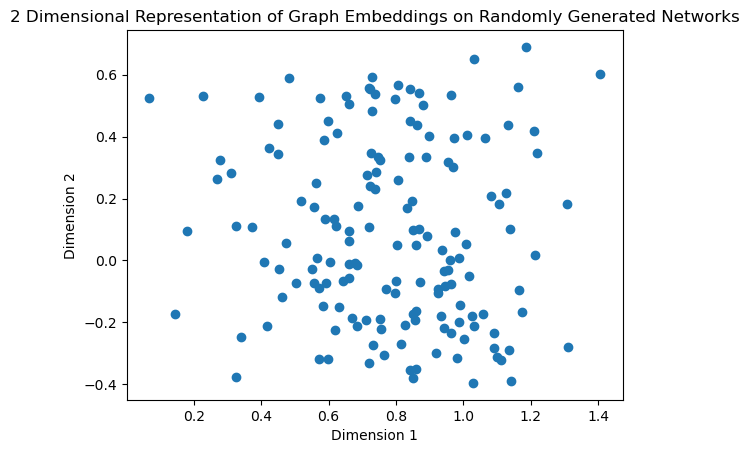

In [9]:
n_graphs = 10
table_Cardio = pd.read_csv("cardiovascular_system.csv", sep=",", header= None)
odd_rows = table_Cardio.iloc[1::2]
odd_rows.to_csv("Smiles_cardio.csv")

smiles = odd_rows[0].values.tolist()

def t_smiles(smile): 
    return to_networkx(from_smiles(smile), to_undirected=True)

Graphs = list(map(t_smiles, smiles))

g_mdl = Graph2Vec(dimensions=2)
g_mdl.fit(Graphs)
g_emb = g_mdl.get_embedding()
x_coord = [vec[0] for vec in g_emb]
y_coord = [vec[1] for vec in g_emb]

plt.clf()
plt.scatter(x_coord, y_coord)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("2 Dimensional Representation of Graph Embeddings on Randomly Generated Networks")
plt.show()

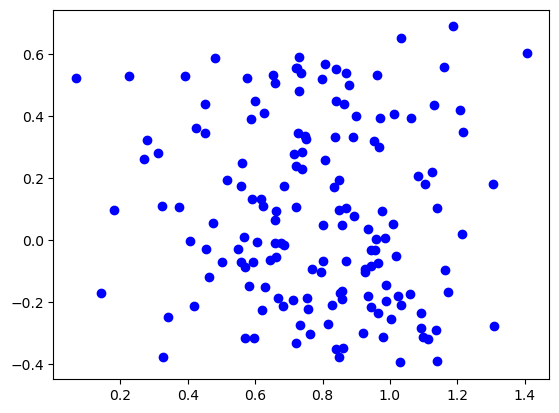

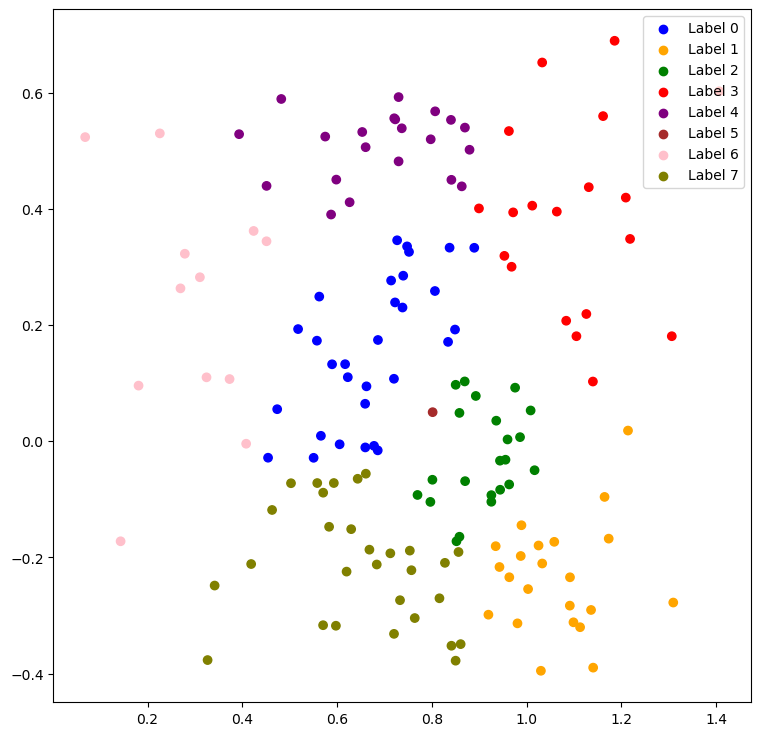

In [14]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

clustering = SpectralClustering(n_clusters=8,
        assign_labels='discretize',
        random_state=0, affinity ='rbf').fit(g_emb)

 
# Training the model and Storing the predicted cluster labels
labels_rbf = clustering.fit_predict(g_emb)
colours = {}
colours[0] = 'blue'
colours[1] = 'orange'
colours[2] = 'green'
colours[3] = 'red'
colours[4] = 'purple'
colours[5] = 'brown'
colours[6] = 'pink'
colours[7] = 'olive'
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
 
b = plt.scatter(x_coord, y_coord, color ='blue')

plt.figure(figsize =(9, 9))
plt.scatter(x_coord, y_coord, c = cvec)
plt.legend((b, o, g, r, p, br, pnk, ol), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7'))
plt.show()